# Random Forest Regressor

In [3]:
import pandas as pd
import numpy as np
from time import time
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.cross_validation import cross_val_score
from sklearn.learning_curve import learning_curve
from sklearn.cross_validation import ShuffleSplit
from sklearn.cross_validation import KFold
%matplotlib inline
%run -i ../../tools/label_encoder.py
%run -i ../../tools/predict_functions_new.py

# Maths

In [4]:
data_2014_2 = pd.read_csv('../../DatosFTPICFES/SABER11/SB11-BASES_DE_DATOS/READY/2014_2.csv', delimiter=';')
S_Data = data_2014_2.sort_values(by='PUNT_MATEMATICAS')

In [5]:
y_list=['DECIL_LECTURA_CRITICA', 'PUNT_LECTURA_CRITICA', 'DECIL_MATEMATICAS', 'PUNT_MATEMATICAS', 'DECIL_C_NATURALES',
        'PUNT_C_NATURALES', 'DECIL_SOCIALES_CIUDADANAS', 'PUNT_SOCIALES_CIUDADANAS', 'DECIL_INGLES', 'DESEMP_INGLES',
        'PUNT_INGLES', 'DECIL_RAZONA_CUANT', 'PUNT_RAZONA_CUANT', 'DECIL_COMP_CIUDADANA', 'PUNT_COMP_CIUDADANA', 
        'PUNT_GLOBAL', 'ESTU_PUESTO']
new_y_list = ['PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES',
             'PUNT_RAZONA_CUANT', 'PUNT_COMP_CIUDADANA', 'PUNT_GLOBAL']
X_list = S_Data.columns.difference(y_list)

In [6]:
X = S_Data.filter(items = X_list)
Y = S_Data.filter(items = new_y_list)

Mean Score: 9.18336784932
Takes: 631.1436674594879 seconds


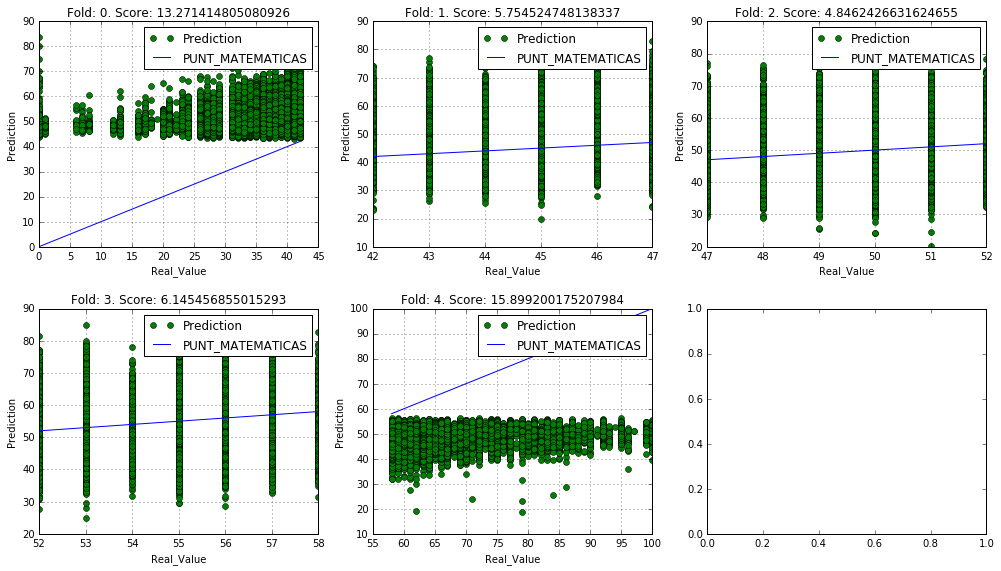

In [42]:
st = time()
rf = RandomForestRegressor(n_jobs=4)
kf = KFold(X.shape[0], n_folds=5)
plot_predictions_KF(rf, 'PUNT_MATEMATICAS', X, Y, kf)
print('Takes:', time()-st, 'seconds')

Mean Score: 6.83656557162
Takes: 658.2272403240204 seconds


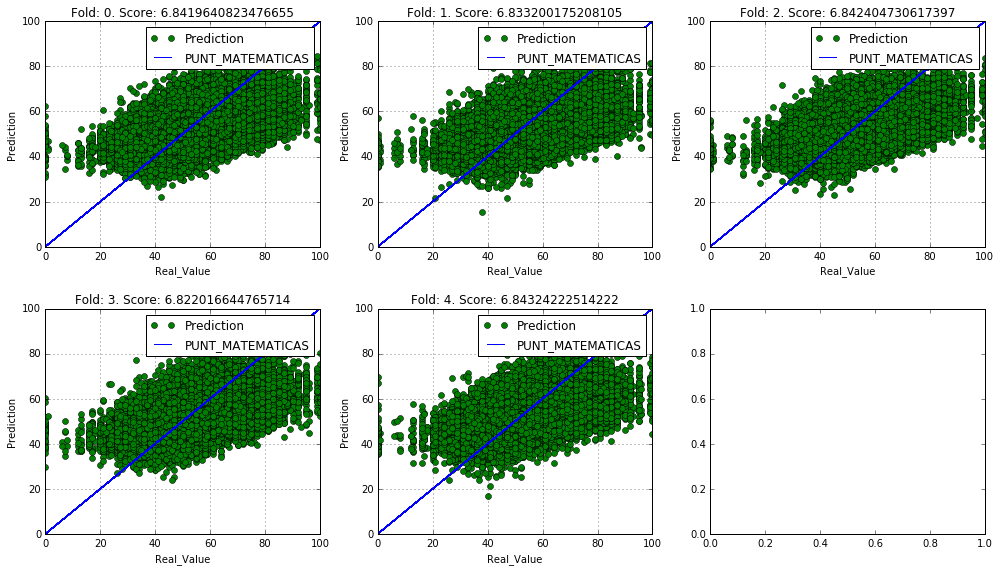

In [43]:
st = time()
rf = RandomForestRegressor(n_jobs=4)
rs = ShuffleSplit(n = X.shape[0], n_iter=5, test_size=0.2)
plot_predictions_KF(rf, 'PUNT_MATEMATICAS', X, Y, rs)
print('Takes:', time()-st, 'seconds')

# Feature Analysis

In [9]:
fi = rf.feature_importances_
cols = X.columns
arr = {'col1':fi, 'col2':cols}
Feature_imp = pd.DataFrame(arr)
Feature_imp.sort_values(by='col1', inplace=True)

NameError: name 'rf' is not defined

In [8]:
Feature_imp.plot(kind='bar', grid=True, figsize=(7,6));
plt.xticks(range(Feature_imp.shape[0]), Feature_imp['col2']);

NameError: name 'Feature_imp' is not defined

In [28]:
S_Feature_imp = Feature_imp.iloc[21:]
S_Feature_imp = S_Feature_imp[['col2']].values #Saves an array of one element lists
New_X_List = [i[0] for i in S_Feature_imp]

In [29]:
New_X_List

['FAMI_INTERNET',
 'COLE_CARACTER',
 'COLE_NATURALEZA',
 'ESTU_ETNIA',
 'ESTU_TIPO_CARRERA_DESEADA',
 'FAMI_PISOSHOGAR',
 'ESTU_GENERO',
 'ESTU_ZONA_RESIDE',
 'ESTU_DEPTO_PRESENTACION',
 'FAMI_CUARTOS_HOGAR',
 'ESTU_VECES_ESTADO',
 'ESTU_COD_RESIDE_DEPTO',
 'COLE_JORNADA',
 'FAMI_OCUPA_PADRE',
 'FAMI_OCUPA_MADRE',
 'FAMI_PERSONAS_HOGAR',
 'FAMI_EDUCA_PADRE',
 'ESTU_IES_MPIO_DESEADA',
 'ESTU_NACIMIENTO_MES',
 'ESTU_COD_PLANTEL',
 'ESTU_MCPIO_PRESENTACION',
 'FAMI_INGRESO_FMILIAR_MENSUAL',
 'ESTU_IES_COD_DESEADA',
 'ESTU_NACIMIENTO_DIA',
 'ESTU_EDAD',
 'COLE_COD_ICFES',
 'FAMI_NIVEL_SISBEN']

Now trying with the New List:

As we can see, the score did not get an improve but the time did.

Mean Score: 6.86653929041
elapsed time: 207.81642317771912


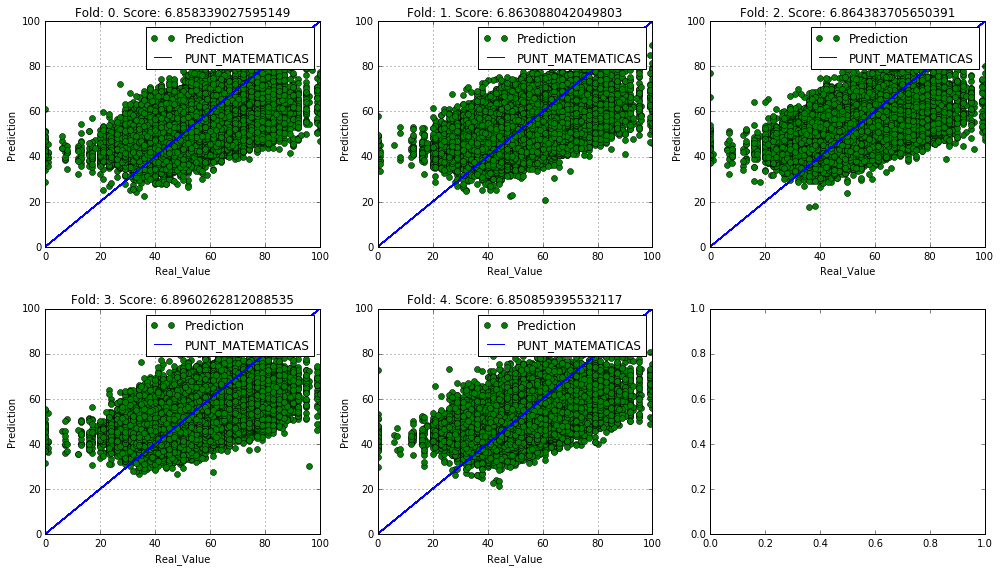

In [30]:
X_min = X[New_X_List]
st = time()
rf = RandomForestRegressor(n_jobs=4)
rs = ShuffleSplit(n = X_min.shape[0], n_iter=5, test_size=0.2)
plot_predictions_KF(rf, 'PUNT_MATEMATICAS', X_min, Y, rs)
print('elapsed time:', time()-st)

## Polynomial

EXP 2:

The Model with the Data raised to the power of 2 gives:
Mean Score: 9.18657748576


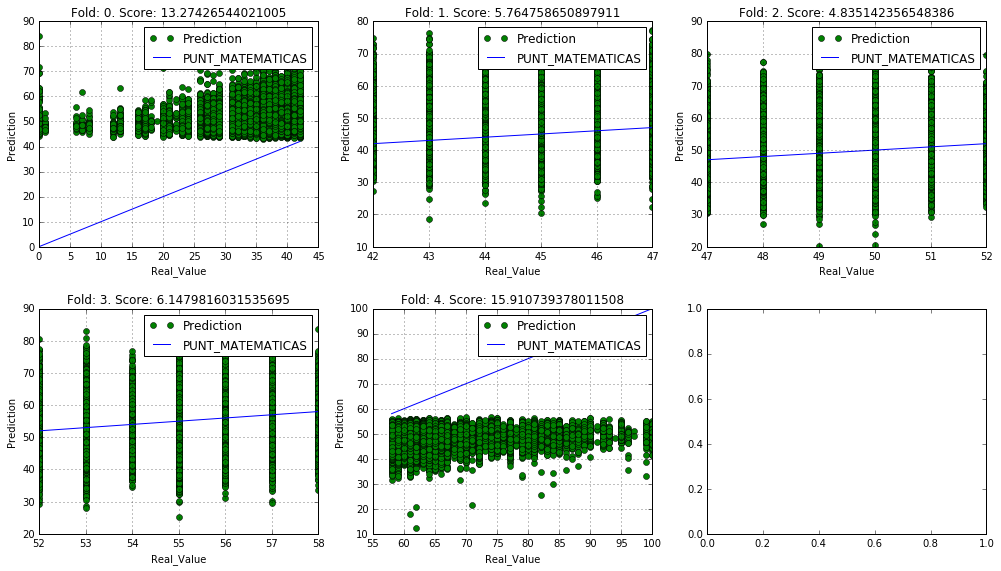

In [44]:
rf = RandomForestRegressor(n_jobs=4)
get_exp_prediction(rf, 2, S_Data, 'PUNT_MATEMATICAS', 5)

The Model with the Data raised to the power of 2 gives:
Mean Score: 6.84816136662
This tooks 519.2693822383881


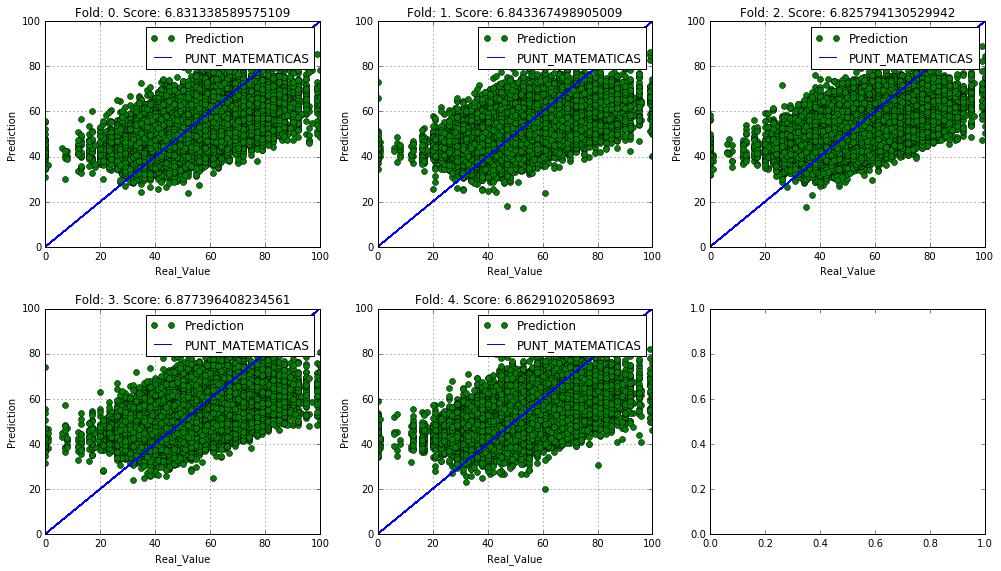

In [45]:
st = time()
rf = RandomForestRegressor(n_jobs=4)
get_exp_prediction(rf, 2, S_Data, 'PUNT_MATEMATICAS', 5, shuffle_split = True)
print('This tooks', time()-st)

EXP 3:

The Model with the Data raised to the power of 3 gives:
Mean Score: 9.18568339904


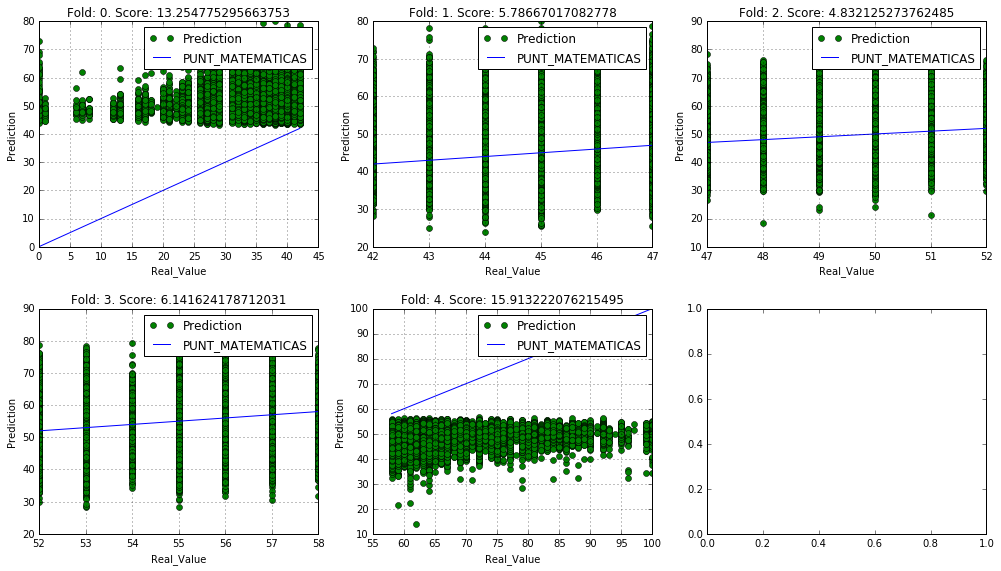

In [46]:
rf = RandomForestRegressor(n_jobs=4)
get_exp_prediction(rf, 3, S_Data, 'PUNT_MATEMATICAS', 5)

The Model with the Data raised to the power of 3 gives:
Mean Score: 6.84355392028
This tooks 255.02319145202637


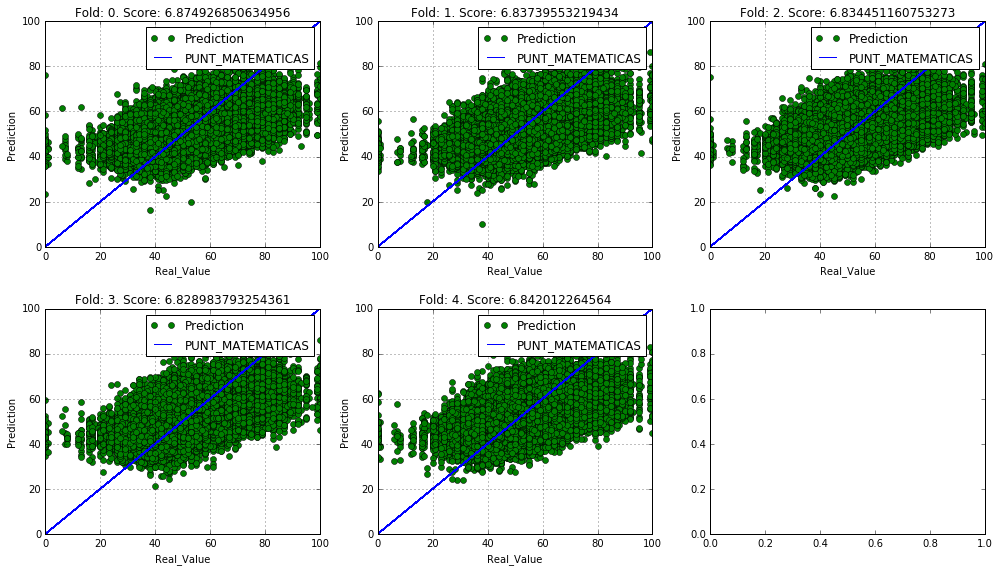

In [47]:
st = time()
rf = RandomForestRegressor(n_jobs=4)
get_exp_prediction(rf, 3, S_Data, 'PUNT_MATEMATICAS', 5, shuffle_split = True)
print('This tooks', time()-st)

## Polynomial Features
degree 2:

In [50]:
Poly = PolynomialFeatures(degree = 2)
Poly_X = Poly.fit_transform(X)
print('data ready')
Poly_X = pd.DataFrame(Poly_X)
st = time()
rf = RandomForestRegressor(n_jobs=4, oob_score=True)
rf.fit(Poly_X, Y['PUNT_MATEMATICAS'])
print('MAE: ',MAD(Y['PUNT_MATEMATICAS'], rf.oob_prediction_))
print('this takes: ', time()-st, 'seconds')

data ready
MAE:  8.012805992532968
this takes:  3718.2335357666016 seconds


### Trying with PCA

/usr/local/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:687: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:687: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:687: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:687: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

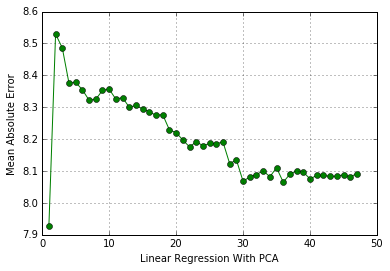

In [56]:
components = range(1,48)
#cv = ShuffleSplit(n = X.shape[0], n_iter=5, test_size=0.2, random_state=0)
scores = []
for i in components:
    rf = RandomForestRegressor(n_jobs=4, oob_score=True)
    rf.fit(PCA(n_components=i).fit_transform(X), Y['PUNT_MATEMATICAS'])
    scores.append(MAD(Y['PUNT_MATEMATICAS'], rf.oob_prediction_))
r = np.array([j for j in scores])
plt.plot(components, r, "o-", color="green", label="test")
plt.grid()
#plt.fill_between(components, r[:,0]-r[:,1], r[:,0]+r[:,1], color="green", alpha=.2)
plt.xlabel("Linear Regression With PCA")
plt.ylabel("Mean Absolute Error")

It's clear, the best performance was obtained with just 1 component.

In [69]:
st = time()
pca = PCA(n_components=1)
pca_X = pca.fit_transform(X)
pca_X = pd.DataFrame(pca_X)
rf = RandomForestRegressor(n_jobs=4, oob_score=True)
rf.fit(pca_X, Y['PUNT_MATEMATICAS'])
print('MAE: ',MAD(Y['PUNT_MATEMATICAS'], rf.oob_prediction_))
print('This one takes:', time()-st)

MAE:  7.9367415125947955
This one takes: 41.801780462265015


/usr/local/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:687: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


## Obtained Results

|           |    1   |      2     |EXP 2 |     |EXP 3|     |Poly 2|Poly 3        |PCA-1components|
|-----------|-------:|-----------:|-----:|----:|----:|----:|-----:|-------------:|
|           |Kfolds 5|ShuffleSplit|1     |2    |1    |2    |      |              |2               |
|MATEMATICAS|9.18    |6.83        |9.18  |6.84 |9.18 |6.84 |8.01  |TAKES TOO LONG|     7.78       |

The 3 best algorithms are:  

|BEST ALGORITHMS    |Score/time[SEG]    |Score/time[SEG]     |Score/time[SEG]    |Score/time[SEG]   |
|--------:          |------------------:|-------------------:|------------------:|-----------------:|
|**Algorithm**      |ShuffleSplit 5     |EXP 2 + ShuffleSplit|EXP 3+ShuffleSplit |PCA(1 components) |
|**Old Data**       |6.83 / 658.22      |6.84/519.26         |6.84 / 255.02      |7.93 / 41.8       |



___

## Now Trying with the New X data

In [3]:
New_X_list = ['FAMI_INTERNET', 'COLE_CARACTER', 'COLE_NATURALEZA', 'ESTU_ETNIA', 'ESTU_TIPO_CARRERA_DESEADA',
              'FAMI_PISOSHOGAR', 'ESTU_GENERO', 'ESTU_ZONA_RESIDE', 'ESTU_DEPTO_PRESENTACION', 'FAMI_CUARTOS_HOGAR',
              'ESTU_VECES_ESTADO', 'ESTU_COD_RESIDE_DEPTO', 'COLE_JORNADA', 'FAMI_OCUPA_PADRE', 'FAMI_OCUPA_MADRE',
              'FAMI_PERSONAS_HOGAR', 'FAMI_EDUCA_PADRE', 'ESTU_IES_MPIO_DESEADA', 'ESTU_NACIMIENTO_MES', 
              'ESTU_COD_PLANTEL', 'ESTU_MCPIO_PRESENTACION', 'FAMI_INGRESO_FMILIAR_MENSUAL', 'ESTU_IES_COD_DESEADA',
              'ESTU_NACIMIENTO_DIA', 'ESTU_EDAD', 'COLE_COD_ICFES', 'FAMI_NIVEL_SISBEN']
new_y_list = ['PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES',
             'PUNT_RAZONA_CUANT', 'PUNT_COMP_CIUDADANA', 'PUNT_GLOBAL']
New_X = S_Data.filter(items = New_X_list)
New_Y = S_Data.filter(items = new_y_list)

Normal with ShuffleSplit

Mean Score: 6.870740195648874
Takes: 176.40839266777039 seconds


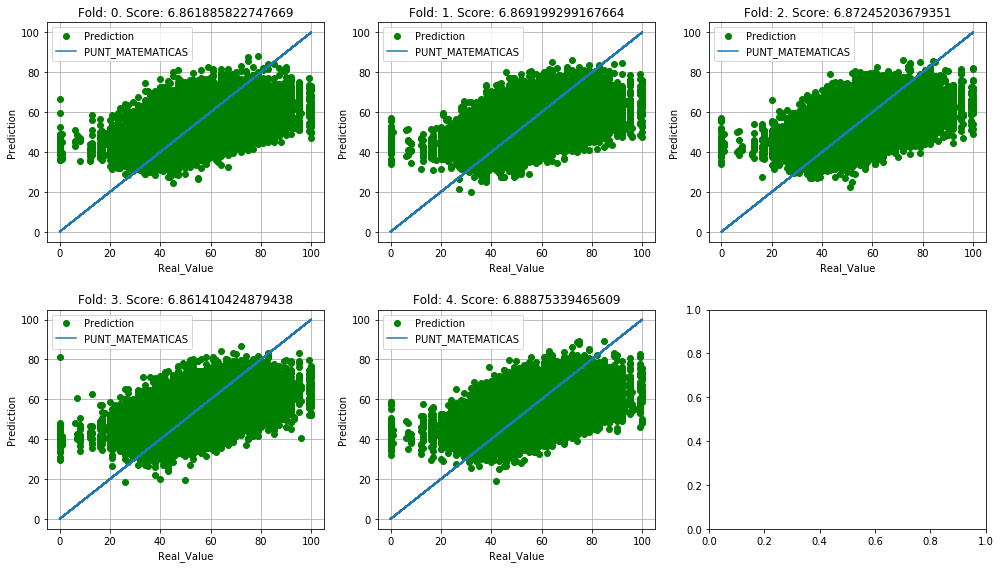

In [5]:
st = time()
rf = RandomForestRegressor(n_jobs=4)
rs = ShuffleSplit(n_splits=5, test_size=0.2)
rs_split = rs.split(New_X)
plot_predictions_KF(rf, 'PUNT_MATEMATICAS', New_X, New_Y, rs_split)
print('Takes:', time()-st, 'seconds')

EXP 2 with ShuffleSplit

Mean Score: 6.864401471747664
This tooks 183.36198115348816


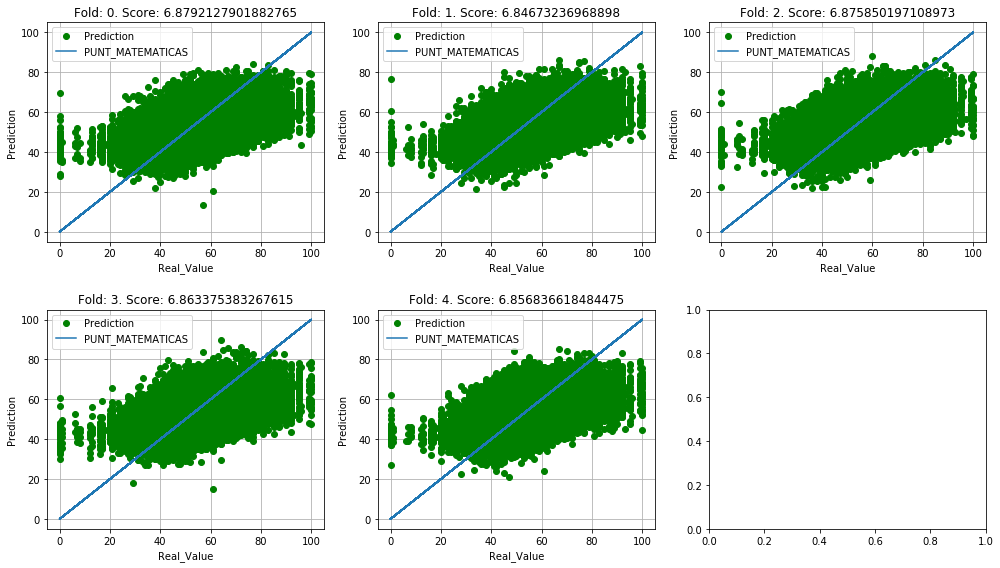

In [4]:
st = time()
rf = RandomForestRegressor(n_jobs=4)
exped_X = New_X**2
rs = ShuffleSplit(n_splits=5, test_size=0.2)
kf = rs.split(exped_X)
plot_predictions_KF(rf, 'PUNT_MATEMATICAS', exped_X, New_Y, kf)
print('This tooks', time()-st)

EXP 3 with ShuffleSplit

Mean Score: 6.867548103372664
This tooks 173.1865291595459


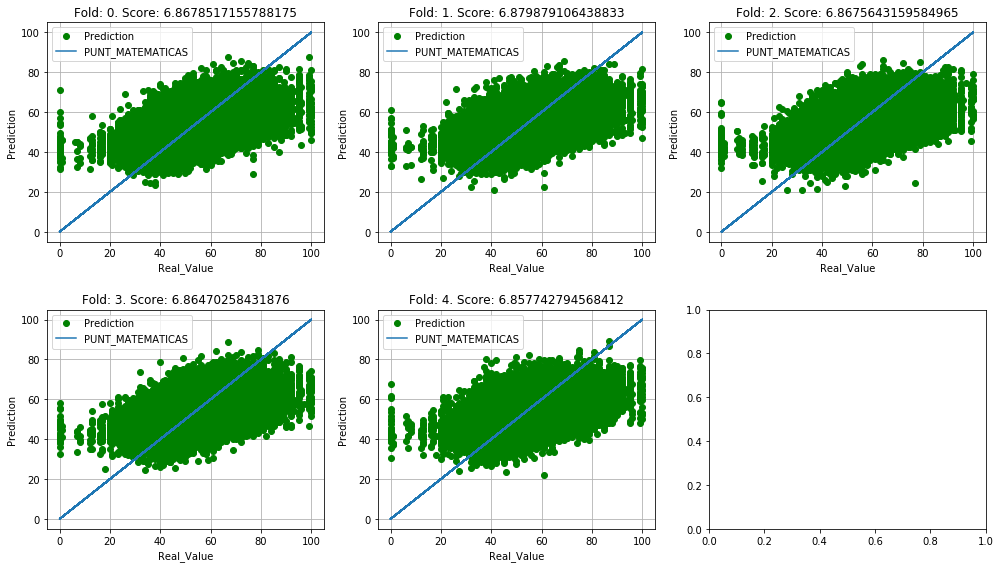

In [5]:
st = time()
rf = RandomForestRegressor(n_jobs=4)
exped_X = New_X**3
rs = ShuffleSplit(n_splits=5, test_size=0.2)
kf = rs.split(exped_X)
plot_predictions_KF(rf, 'PUNT_MATEMATICAS', exped_X, New_Y, kf)
print('This tooks', time()-st)

with PCA of 1 component

In [4]:
st = time()
pca = PCA(n_components=1)
pca_X = pca.fit_transform(New_X)
pca_X = pd.DataFrame(pca_X)
rf = RandomForestRegressor(n_jobs=4, oob_score=True)
rf.fit(pca_X, New_Y['PUNT_MATEMATICAS'])
print('MAE: ',MAD(New_Y['PUNT_MATEMATICAS'], rf.oob_prediction_))
print('This one takes:', time()-st)

MAE:  7.942098748171701
This one takes: 14.350788116455078


/home/aronf/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


## Obtained Results

|           |    1   |      2     |EXP 2 |     |EXP 3|     |Poly 2|Poly 3        |PCA-1components|
|-----------|-------:|-----------:|-----:|----:|----:|----:|-----:|-------------:|
|           |Kfolds 5|ShuffleSplit|1     |2    |1    |2    |      |              |2               |
|MATEMATICAS|9.18    |6.83        |9.18  |6.84 |9.18 |6.84 |8.01  |TAKES TOO LONG|     7.78       |

The 3 best algorithms are:  

|BEST ALGORITHMS    |Score/time[SEG]    |Score/time[SEG]     |Score/time[SEG]    |Score/time[SEG]   |
|--------:          |------------------:|-------------------:|------------------:|-----------------:|
|**Algorithm**      |ShuffleSplit 5     |EXP 2 + ShuffleSplit|EXP 3+ShuffleSplit |PCA(1 components) |
|**Old Data**       |6.83 / 658.22      |6.84/519.26         |6.84 / 255.02      |7.93 / 41.8       |
|**New Data**       |6.87 / 146.4       |6.86 / 183.36       |6.86 / 173.18      |7.94 / 14.35      |

The work will be performed with the New X Data, because of the improvements in time.

In [4]:
components = range(1,48)
scores1 = []
for i in components:
    rf = RandomForestRegressor(n_jobs=4, oob_score=True, max_depth=i)
    rf.fit(New_X, New_Y['PUNT_MATEMATICAS'])
    scores1.append(MAD(New_Y['PUNT_MATEMATICAS'], rf.oob_prediction_))
r1 = np.array([j for j in scores1])

/home/aronf/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/aronf/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/aronf/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/aronf/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn

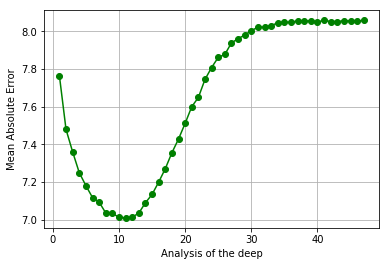

In [5]:
plt.plot(components, r1, "o-", color="green", label="test")
plt.grid()
plt.xlabel("Analysis of the deep")
plt.ylabel("Mean Absolute Error")

In [6]:
print('With', list(r1).index(min(r1))+1, 'levels we can find the min error of:', min(r1))

With 11 levels we can find the min error of: 7.00874086999104


Mean Score: 6.524377398055125
Takes: 96.48270511627197 seconds


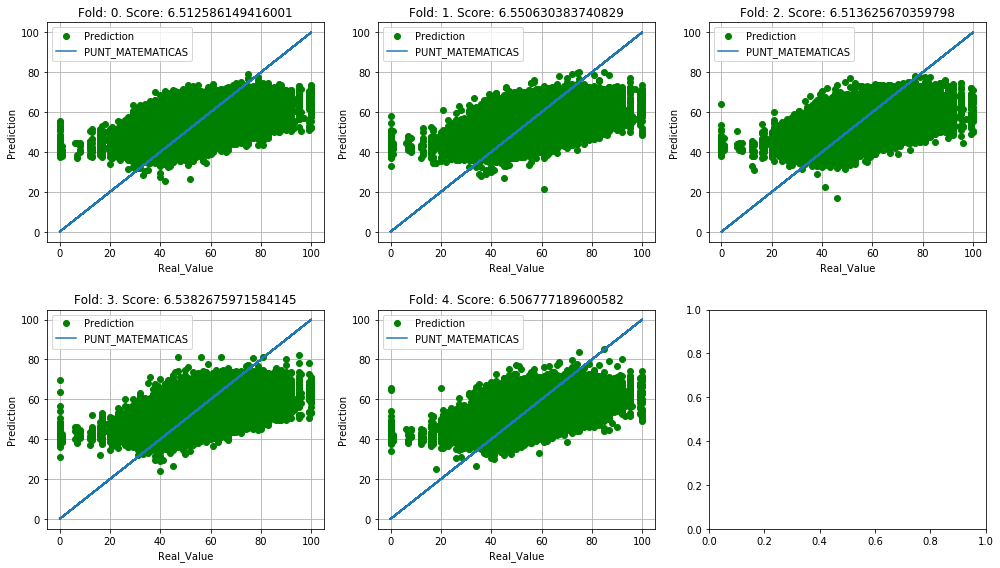

In [4]:
st = time()
rf = RandomForestRegressor(n_jobs=4, max_depth=11)
rs = ShuffleSplit(n_splits=5, test_size=0.2)
rs_split = rs.split(New_X)
plot_predictions_KF(rf, 'PUNT_MATEMATICAS', New_X, New_Y, rs_split)
print('Takes:', time()-st, 'seconds')

<module 'matplotlib.pyplot' from '/usr/local/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py'>

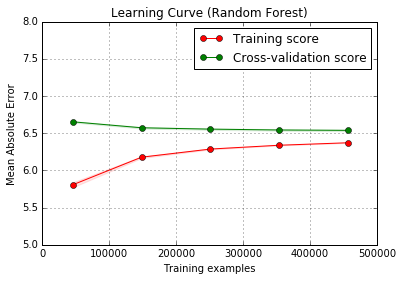

In [7]:
title = "Learning Curve (Random Forest)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.

cv = ShuffleSplit(n = X.shape[0], n_iter=5, test_size=0.2)
#rs = ShuffleSplit(n_splits=5, test_size=0.2)
#cv = rs.split(X2)

estimator = RandomForestRegressor(n_jobs=4, max_depth = 11)
plot_learning_curve(estimator, title, X, Y['PUNT_MATEMATICAS'], ylim=(5, 8), cv=cv, n_jobs=4)

# Conclusion

The **CHOSEN** way to predict:

* Random Forest Regressor *max_depth* 11 + Old Data + ShuffleSplit

Last Score Obtained: 

|Score[MAE]|Time[s]|
|---------:|------:|
|6.52      |96.48  |

Metric used: 

* For the Score was used the **Mean Absolute Error (MAE)** 
* For the time was used the **seconds unit (s)**